In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# use LaTeX fonts in the plot
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
def plot_distances(distances):
    fig, ax = plt.subplots()
    
    ax.plot(distances)
    
    plt.show()

def scatter_points(points):
    fig, ax = plt.subplots(figsize=(10,10))
    
    ax.set_xlim([-20,20])
    ax.set_ylim([-20,20])

    ax.plot(points[0],points[1])
    
    plt.show()

In [4]:
def ideal_box_distances(radius):
    # Hypotenuse = radius / cos(theta)
    first_45  = np.full(46, radius) / np.cos(np.radians(np.arange(46)))
    second_45 = np.flip(first_45, axis=0)[1:]
    ninety = np.concatenate((first_45, second_45), axis=None)
    trimmed_ninety = ninety[1:]
    return np.concatenate((ninety, trimmed_ninety, trimmed_ninety, trimmed_ninety[:-1]), axis=None)

In [5]:
def distances_to_coords(distances, center):
    x_coords = center[0] + (distances * np.sin(np.radians(np.arange(360))))
    y_coords = center[1] + (distances * np.cos(np.radians(np.arange(360))))
    return x_coords, y_coords

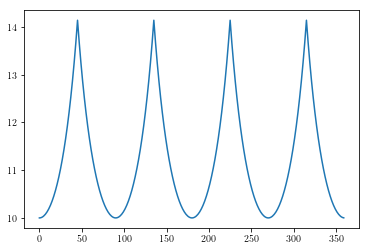

In [6]:
distances = ideal_box_distances(10)

plot_distances(distances)

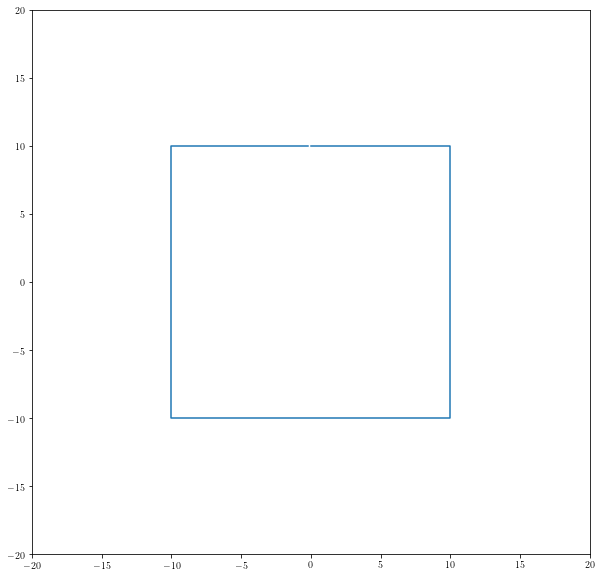

In [7]:
coords = distances_to_coords(distances, (0,0))

scatter_points(coords)